# Analyse der Nobelpreis Gewinner

In diesem Notebook wird eine beispielhafte Analyse der Nobelpreis Gewinner durchgeführt. Die verwendeten Techniken und Kommandos sind denen sehr ähnlich, die ihr für die Durchführung des Versuchs benötigt.


**Wichtig:** Jede Code Box muss seperat ausgewählt und durch "shift+enter" ausgeführt werden. Auf die selbe Weise führt ihr auch euren eigenen Code aus.
Wenn `In [x]:` durch `In [*]:` ersetzt wird, bedeutet dies, dass der Code der entsprechenden Box gerade läuft.

Als erstes werden die benötigten Bibliotheken geladen und die Daten eingelesen.

In [1]:
from __future__ import print_function
from __future__ import division

%pylab inline
# Setup the notebook and download the data

import functools
import hashlib
import os
import warnings
from subprocess import check_output

import numpy
from ipywidgets import interact
import pandas
#from root_pandas import read_root
from scipy import stats as st
from matplotlib import pyplot as plt


warnings.filterwarnings("ignore")
rcParams['image.cmap'] = 'Blues'  # change default colormap
pandas.set_option('display.max_columns', None)

def parse_year(s):
    try:
        if s[-3] == '-':
            return int('19' + s[-2:])
        elif s[-4:] == 'Data':   # If there is a value of no data set the age to something
            return 1000          # Large that we can filter later
        else:
            return int(s[-4:])
    except Exception:
        return 1000

os.listdir("/mnt/c/Users/MrJowhn/Desktop/Uni/Notebook/")    
data = pandas.read_csv('/mnt/c/Users/MrJowhn/Desktop/Uni/Notebook/nobel.csv', ',')
data['BirthYear'] = data['Birthdate'].apply(parse_year)
data = data.query('BirthYear > 1000')

Populating the interactive namespace from numpy and matplotlib


Jetzt werden die ersten Zeilen der Daten Tabelle betrachtet. Die Zeilen beinhalten jeweils einen vergebenen Nobelpreis. Die Spalten enthalten Informationen über den jeweiligen Gewinner.

Die Daten befinden sich einem Pandas DataFrame. Daher können alle damit verknüpften Funktionen verwendet werden. Eine nützliche Funktion ist `.head()`, diese Funktion gibt die ersten zeilen der Daten Tabelle aus.

In [2]:
data.head(5) # Displaying some of the data so you can see what form it takes in the DataFrame

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...,1852
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...,1839
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...,1854
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1822
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1828


# Erstellen eines Histogrammes

Hier wird die Anzahl der in jedem Jahr vergebenen Preise geplottet. Nobelpreise können in jeder Kategorie an biszu drei Personen pro Jahr vergeben werden. Da es für jeden einzelen Gewinner einen seperaten Eintrag in den Daten gibt, kann man aus dem Histogramm lesen, ob es einen ab- oder zunehmenden Trend bei der Vergabe des Preises an multiple Gewinner gibt.

Im Vorhinein ist es jedoch sinnvoll Informationen über die Daten zu gewinnen. Daher wird jetzt der Wertebereich der zu plottenden Daten untersucht.

In [3]:
# print the earliest year in the data
print(data.Year.min())

1901


In [4]:
# print the latest year in the data
print(data.Year.max())

2010


Die Daten enthalten auch Einträge für Economie. Economie war keiner der ursprünglichen Nobelpreise und wrd erst seid 1969 vergeben. Wenn wir nun einen fairen Vergleich haben wollen, müssen wir diese Preise aussortieren. Dies kann mit Hilfe einer Pandas query tun.

Ob noch Economie Preise vorhanden sind, kann mit der Länge des Datensatzes  (`len`) für Economie Preise  testen, nachdem die Query angewandt worden ist. Dies kann auch in dem Versuch verwendet werden um die Zahl an $B^+$ und $B^-$ Mesonen zu bestimmen.

In [5]:
# filter out the Economics prizes from the data
data_without_economics = data.query("Category != 'economics'")
print('Number of economics prizes in "data_without_economics":')
print(len(data_without_economics.query("Category == 'economics'")))

Number of economics prizes in "data_without_economics":
0


Jetzt kann ein Histogramm über einen sinnvollen Bereich mit Hilfe der `hist` Funktion von `matplotlib` geplottet werden. Diese Funktion werdet ihr öfter während des Versuch verwenden müssen.

Text(0, 0.5, 'Number of Winners')

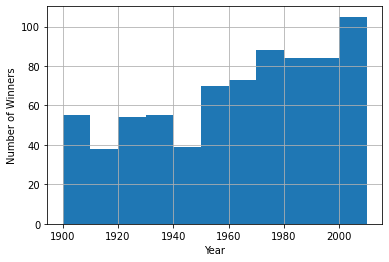

In [6]:
# plot the histogram of number of winners against year
H_WinnersPerYear = data_without_economics.Year.hist(bins=11, range=[1900, 2010]) 
xlabel('Year')
ylabel('Number of Winners')

Aus dem Histogramm ist zu erkennen, dass es einen Trend zu mehr Gewinnern pro Jahr gibt. Dennoch ist ein Einbruch im Bereich von 1940 - 1950 zu erkennen. Dies ist durch das Aussetzen der Vergabe einiger Preise während des 2ten Weltkrieges bedingt. Um diese Lücke zu isolieren kann das Binning angepasst werden.

In [7]:
def plot_hist(bins): 
    changingBins = data_without_economics.Year.hist(bins=bins, range=[1900,2010])
    xlabel('Year')
    ylabel('Number of People Given Prizes')
    BinSize = round(60/bins, 2)
    print(BinSize)

interact(plot_hist, bins=[2, 50, 1])

interactive(children=(Dropdown(description='bins', options=(2, 50, 1), value=2), Output()), _dom_classes=('wid…

<function __main__.plot_hist(bins)>

## Vorselektion

Jetzt sollen die Daten selektiert werden. Dies ist das selbe Vorgehen, wie das Aussortieren des Economie Preises. Jetzt wird dies jedoch detailierter  betrachtet. Dabei sollen diesmal alle Kategorien außer Physik aussortiert werden. Dies könnte durch das Erstellen eines neuen Datasets unter Verwendung von Bedingungen und Schleifen aus dem ursprünglichen Dataset geschehen. Die Pandas Funktion `.query()`ermöglicht jedoch eine einfachere Möglichkeit. Durch in einem String festgelegte Bedingungen wird ein neues Dataframe erstellt, in dem alle Einträge die Bedingungen erfüllen.

In [8]:
modernPhysics = "(Category == 'physics' && Year > 2005)" # Integer values don't go inside quotes
physicsOnly = "(Category == 'physics')"
# apply the physicsOnly query
physicsOnlyDataFrame = data.query(physicsOnly)

Jetzt können die neuen Datframes untersucht werden.

In [9]:
physicsOnlyDataFrame.head(5)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867


Diese Technik wird in dem Versuch hilfreich sein um die Kaonen zu selektieren. Jetzt wird die Zahl der Gewinner pro Jahr nur für Preise in Physik geplottet.

Text(0, 0.5, 'Number of Winners in Physics')

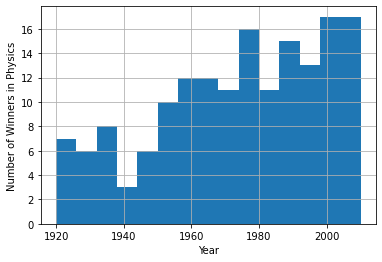

In [10]:
H_PhysicsWinnersPerYear = physicsOnlyDataFrame.Year.hist(bins=15, range=[1920,2010])
xlabel('Year') #Plot an x label
ylabel('Number of Winners in Physics') #Plot a y label

# Scatter Plots und 2D Histogramme
### Hinzufügen neuer Informationen zu dem Dataframe

Dieser Abschnitt wird hilfreich sein, wenn in dem Versuch Dalitz Plots erstellt werden müssen.

Es soll betrachtet werden, in welchem Alter Personen einen Nobelpreis erhalten haben, und die Spanne des Alters gemessen werden.

Darauf kann untersucht werden, ob mit der Zeit das Alter in dem ein Nobelpreis erhalten wird ab oder zunimmt.

Dazu muss zunächst das Alterberechnet werden, in dem die Preisträger ausgezeichnet worden sind. Dazu können die Spalten `year` und `birthdate`kombiniert werden um den Daten die variable `AgeAwarded` hinzuzufügen.

In [11]:
# Create new variable in the dataframe
physicsOnlyDataFrame['AgeAwarded'] = physicsOnlyDataFrame.Year - physicsOnlyDataFrame.BirthYear
physicsOnlyDataFrame.head(5)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear,AgeAwarded
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845,56
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853,49
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865,37
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852,51
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867,36


Jetzt kann ein Histogramm mit dem Alter, in dem die Preisträger ausgezeichnet worden sind , erstellt werden.

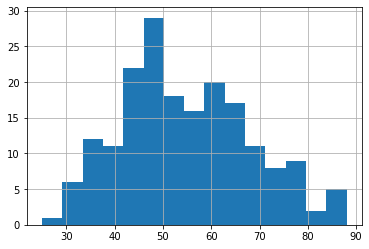

In [12]:
# plot a histogram of the laureates ages
H_AgeAwarded = physicsOnlyDataFrame.AgeAwarded.hist(bins=15)

### Berechnungen machen

Jetzt soll die Spanne des Alters der Gewinner bestimmt werden. Dazu wird die Satndardabweichung berechnet.

In [13]:
# count number of entries
NumEntries = len(physicsOnlyDataFrame)
# calculate square of ages
physicsOnlyDataFrame['AgeAwardedSquared'] = physicsOnlyDataFrame.AgeAwarded**2
# calculate sum of square of ages, and sum of ages
AgeSqSum = physicsOnlyDataFrame['AgeAwardedSquared'].sum()
AgeSum = physicsOnlyDataFrame['AgeAwarded'].sum()
# calculate std and print it
std = sqrt((AgeSqSum-(AgeSum**2/NumEntries)) / NumEntries)
print(std)

13.314524371459262


Es gibt tatsächlich auch eine Funktion, die diese Fingerübung komplett übernimmt.

In [14]:
# calculate standard deviation (rms) of distribution
print(physicsOnlyDataFrame['AgeAwarded'].std())

13.350268125361104


### Scatter Plot

Jetzt soll mit einem Scatter Plot das Alter der Preisträger gegen das Jahr , in dem der Preis verliehen worden ist, geplottet werden.

Text(0, 0.5, 'Age Awarded')

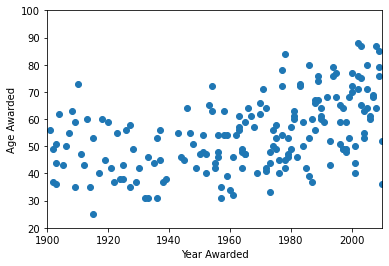

In [15]:
scatter(physicsOnlyDataFrame['Year'], physicsOnlyDataFrame['AgeAwarded'])
plt.xlim(1900, 2010) # change the x axis range
plt.ylim(20, 100)  # change the y axis range
xlabel('Year Awarded')
ylabel('Age Awarded')

### 2D Histogramm

Es kann auch ein 2D Histogramm erstellt werden, in dem das Ergebnis gebinnt wird. Das die Zahl der Einträge in den Daten recht gering sind, sollten Bins in einer angemessenen Größe verwendet werden, sodass jeder Bin noch eine akzeptabele Statistik enthält. Dabei muss beachtet werden, dass die Gesamtanzahl an Bins das Quadrat der Bins der einzelnen Achsen ist, welche der Funktion übergeben wird.

Text(0, 0.5, 'Age Awarded')

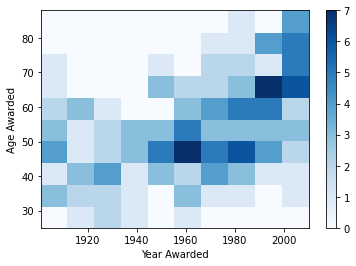

In [16]:
hist2d(physicsOnlyDataFrame.Year, physicsOnlyDataFrame.AgeAwarded, bins=10)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

In [17]:
def plot_histogram(bins):
    hist2d(physicsOnlyDataFrame['Year'].values,physicsOnlyDataFrame['AgeAwarded'].values, bins=bins)
    colorbar() #Set a colour legend
    xlabel('Year Awarded')
    ylabel('Age Awarded')
    
interact(plot_histogram, bins=[10, 20, 1])  # Creates the slider

interactive(children=(Dropdown(description='bins', options=(10, 20, 1), value=10), Output()), _dom_classes=('w…

<function __main__.plot_histogram(bins)>

Die dunkleren Bins in der oberen rechten Ecke zeigen, dass es einen Trend gibt, dass in letzter Zeit Nobelpreise häufig an Personen im höhreren Alter vergeben wurden.

### Verarbeiten von 2D Histogrammen

**Dieser Teil ist recht fortgeschritten und wird lediglich für den letzten Teil des Versuchs benötigt.**

Da in dem Versuch die Berechnung der Asymmetrie auf dem 2D Histogramm benötigt wird, wird hier das entsprechende Vorgehen beispielhaft durchgeführt. Es ist sinnvoll sich mit dem Folgenden auseinander zu setzen, wenn ihr die Bestimmung der lokaler Materie-Antimaterie Unterschiede in dem versuch erreicht habt.

Als erstes wird die Zahl der Einträge in jedem Bin des 2D Histogramms bestimmt und in `physics_counts`als 2D Array abgelegt.

`xedges` und `yedges` sind 1D Arrays, die Position der Bin-Grenzen entlang der Achsen enthält.

Text(0, 0.5, 'Age Awarded')

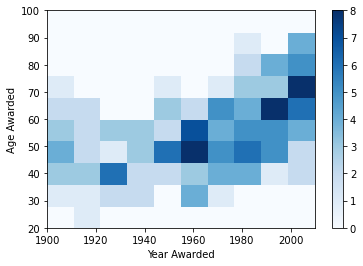

In [18]:
physics_counts, xedges, yedges, Image = hist2d(
    physicsOnlyDataFrame.Year, physicsOnlyDataFrame.AgeAwarded,
    bins=10, range=[(1900, 2010), (20, 100)]
)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

Jetzt wird diese Prozedur wiederholt um das entsprechende Histogramm auch für die Chemie Nobelpreise zu erhalten.

In [19]:
# Make the "chemistryOnlyDataFrame" dataset
chemistryOnlyDataFrame = data.query("(Category == 'chemistry')")
chemistryOnlyDataFrame['AgeAwarded'] = chemistryOnlyDataFrame.Year - chemistryOnlyDataFrame.BirthYear

Text(0, 0.5, 'Age Awarded')

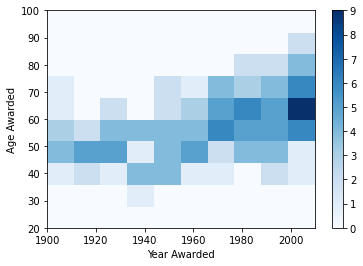

In [20]:
# Plot the histogram
chemistry_counts, xedges, yedges, Image = hist2d(
    chemistryOnlyDataFrame.Year, chemistryOnlyDataFrame.AgeAwarded,
    bins=10, range=[(1900, 2010), (20, 100)]
)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

Die `chemistry_counts` werden von den `physics_counts` subtrahiert und mit ihrer Summe normalisiert. Dies ist als Asymmetrie bekannt.

In [21]:
counts = (physics_counts - chemistry_counts) / (physics_counts + chemistry_counts)

In den Bereichen in denen in keinem der Bereiche ein Preisträger liegt, wird der Wert `nan`annehmen, da durch 0 geteilt wird. Diese Werte sollen nun durch 0 ersetzt werden.

In [22]:
counts[np.isnan(counts)] = 0

Letztlich wird die Asymmetrie mit der `pcolor` function geplottet. Da negative und positive Werte unterschiedliche Bedeutungen haben, wird hier die `seismic` Colormap verwendet. [Hier](http://matplotlib.org/examples/color/colormaps_reference.html) kann eine Liste aller möglichen Colormaps gefunden werden.

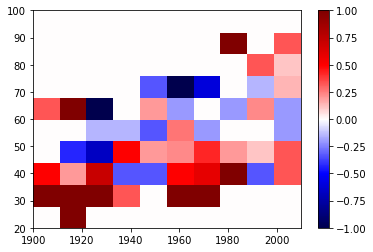

In [23]:
pcolor(xedges, yedges, counts.T, cmap='seismic')
colorbar()